In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 이미지 데이터를 수치형태로 분석하는 함수.
def get_binary(fname, size=16):
    # 이미지 불러옴.
    img = Image.open(fname)
    plt.imshow(img)
    plt.show()
    
    # 이미지를 그레이스케일로 바꿈.
    # L : 그레이스케일, 1 : 이진화, RGB, RGBA, CMYK
    img2 = img.convert('L')
    plt.imshow(img2)
    plt.show()
    
    # 이미지의 사이즈 축소.
    img3 = img2.resize((size, size), Image.ANTIALIAS)
    plt.imshow(img3)
    plt.show()
    
    # 이미지의 Pixel 데이터를 가져옴.
    pixel_data = img3.getdata()
    pixels = np.array(pixel_data)
    # print(pixels)
    
    # 2차원 행렬로 변환.
    pixels = pixels.reshape((size,size))
    # print(pixels)
    
    # 색상값의 평균을 구함.
    avg = pixels.mean()
    # print(avg)
    
    # 평균보다 크면 1, 작으면 0으로 변환.
    diff = 1*(pixels > avg)
    return diff

In [3]:
# 이진 hash 생성.
def get_hash(data):
    bhash = []
    for n in data.tolist():
        
        # 행렬 안에 들어 있는 모든 숫자를 하나씩 추출하여, 문자열로 변환하여 합침.
        s1 = [ str(i) for i in n ]
        s2 = ''.join(s1)
        
        # 이진수를 정수로 변환.
        i = int(s2,2)
        bhash.append('%04x' %i)
    return ''.join(bhash)

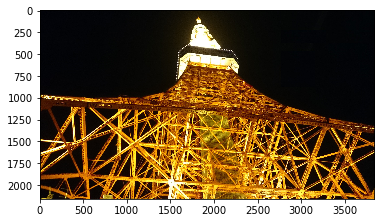

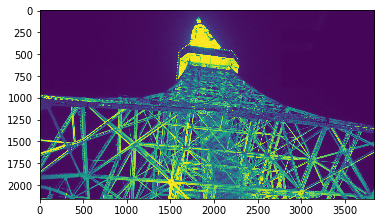

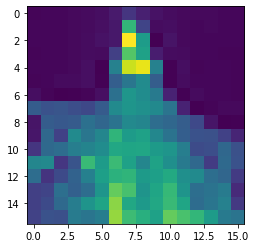

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0]
 [1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0]
 [1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0]
 [1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]]
000001000180018003c003c003c087e07ff05ff07ff2cffa9ffe3ffe3ffe1fff


In [4]:
a1 = get_binary('img/tower.jpg')
print(a1)

# hash 값으로 생성.
a2 = get_hash(a1)
print(a2)